In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df=pd.read_csv("C:\\Users\\ssure\\OneDrive\\Desktop\\customer1.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country.1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850,United Kingdom,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850,United Kingdom,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850,United Kingdom,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850,United Kingdom,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850,United Kingdom,United Kingdom
...,...,...,...,...,...,...,...,...,...
194,536388,21115,ROSE CARAVAN DOORSTOP,4,01/12/2010 9:59,6.75,16250,United Kingdom,United Kingdom
195,536388,22469,HEART OF WICKER SMALL,12,01/12/2010 9:59,1.65,16250,United Kingdom,United Kingdom
196,536388,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,01/12/2010 9:59,1.65,16250,United Kingdom,United Kingdom
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,01/12/2010 10:03,8.50,12431,Australia,Australia


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    199 non-null    object 
 1   StockCode    199 non-null    object 
 2   Description  199 non-null    object 
 3   Quantity     199 non-null    int64  
 4   InvoiceDate  199 non-null    object 
 5   UnitPrice    199 non-null    float64
 6   CustomerID   199 non-null    int64  
 7   Country      199 non-null    object 
 8   Country.1    199 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 14.1+ KB


In [55]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,199.000000,199.000000,199.000000
mean,19.472362,3.582663,15725.703518
std,50.348061,3.548203,1852.424583
min,-1.000000,0.380000,12431.000000
25%,3.000000,1.650000,14688.000000
50%,6.000000,2.550000,16029.000000
75%,12.000000,4.250000,17850.000000
max,432.000000,27.500000,18074.000000


In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country.1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850,United Kingdom,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850,United Kingdom,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850,United Kingdom,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850,United Kingdom,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850,United Kingdom,United Kingdom


In [57]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country.1
194,536388,21115,ROSE CARAVAN DOORSTOP,4,01/12/2010 9:59,6.75,16250,United Kingdom,United Kingdom
195,536388,22469,HEART OF WICKER SMALL,12,01/12/2010 9:59,1.65,16250,United Kingdom,United Kingdom
196,536388,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,01/12/2010 9:59,1.65,16250,United Kingdom,United Kingdom
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,01/12/2010 10:03,8.50,12431,Australia,Australia
198,536389,21622,VINTAGE UNION JACK CUSHION COVER,8,01/12/2010 10:03,4.95,12431,Australia,Australia


In [60]:
df.shape

(199, 9)

In [61]:
# Check for missing values
print(df.isnull().sum())

# Drop duplicates (if any)
df = df.drop_duplicates()

# Drop any irrelevant columns (e.g., duplicates or non-informative columns)
if 'Country.1' in df.columns:
    df = df.drop(columns=['Country.1'])


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Country.1      0
dtype: int64


In [62]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create 'TotalSpend' feature
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# Create RFM (Recency, Frequency, Monetary) dataframe
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                             # Frequency
    'TotalSpend': 'sum'                                                 # Monetary
}).reset_index()

# Rename columns
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm_df.head())


   CustomerID  Recency  Frequency  Monetary
0       12431        0          1     90.60
1       12583        0          1    855.86
2       13047        0          3    366.63
3       13748        0          1    204.00
4       14527        0          1    -27.50


In [63]:
from sklearn.preprocessing import StandardScaler

# Normalize the RFM features
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])


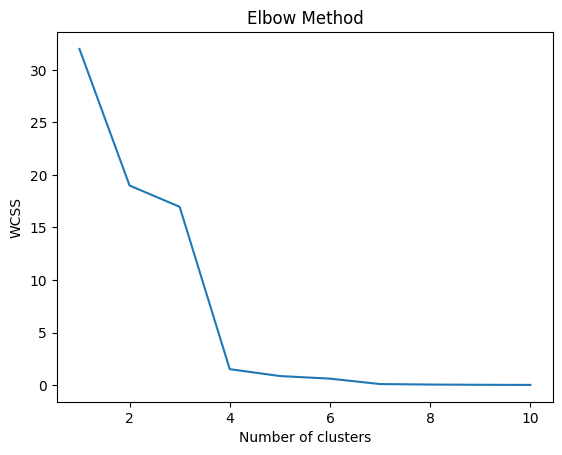

   CustomerID  Recency  Frequency  Monetary  Cluster
0       12431        0          1     90.60        0
1       12583        0          1    855.86        0
2       13047        0          3    366.63        2
3       13748        0          1    204.00        0
4       14527        0          1    -27.50        0


In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)
print(rfm_df.head())


In [65]:
# Analyze the clusters
cluster_analysis = rfm_df.groupby('Cluster').mean()
print(cluster_analysis)


           CustomerID  Recency  Frequency     Monetary
Cluster                                               
0        15333.076923      0.0   1.076923   308.035385
1        17850.000000      0.0   6.000000   725.440000
2        13047.000000      0.0   3.000000   366.630000
3        16029.000000      0.0   2.000000  3702.120000
